In [54]:
import numpy as np
import os
import pickle
import pandas as pd
from IPython.display import display_html
from itertools import chain,cycle
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap


In [ ]:
dir_path = "/home/groups/ChangLab/dharani/seg_eval/adjusted_ratios_luke/results_unequal_0.66/"

#OHSU-TMA/adjusted_ratios_luke/results_equal/"

with open(os.path.join(dir_path, "recall_scores.pkl"), 'rb') as f:
    precision = pickle.load(f)
    
#print(precision)
scores = []
for keys, values in precision.items():
    df_scene_precision = pd.DataFrame(values)
    df_scene_precision = df_scene_precision.round(3)
    #print(keys)
    #display(df_scene_precision)
    for i, j in values.items():
        if i == 12:
            temp = []
            for methods, score in j.items():
                temp.append(score)
            scores.append(temp)
                

df = pd.DataFrame(scores)
df.loc[len(df.index)] = df.mean(axis=0)
#display(df)

In [ ]:

cores = ["Scene002", "Scene003", "Scene017", "Scene049", "Scene059", "Average"]
methods = ["Mesmer", "Stardist", "Cellpose", "UnMicst"]

'''
radius_12 = np.array([[0.843, 0.903, 0.887, 0.973],
                      [0.751, 0.815, 0.949, 0.949],
                      [0.864, 0.906, 0.914, 0.952],
                      [0.923, 0.914, 0.944, 0.983],
                      [0.912, 0.921, 0.908, 0.975],
                      [0.858, 0.891, 0.920, 0.966]])
'''

plt.figure(figsize = (10, 7))
ax = sns.heatmap(df, xticklabels=methods, yticklabels=cores, cmap="RdBu_r").set(title="Recall with Ground Truth")
plt.xlabel("Segmentation Method")
plt.ylabel("TMA Cores")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.savefig("/home/users/thirumal/recall_groundtruth.png", dpi=300)
print("image saved")

In [ ]:
#results_dir = ["/home/groups/ChangLab/dharani/OHSU-TMA/results_mscx/"]#, 
               #"/home/groups/ChangLab/dharani/OHSU-TMA/results_msc/", 
               #"/home/groups/ChangLab/dharani/OHSU-TMA/results_msx/", 
               #"/home/groups/ChangLab/dharani/OHSU-TMA/results_mcx/", 
               #"/home/groups/ChangLab/dharani/OHSU-TMA/results_scx/"]
#results_dir = "/home/groups/ChangLab/dharani/seg_eval/with_unmicst/SRCUX/"
#results_dir = "/home/groups/ChangLab/dharani/seg_eval/with_unmicst/adjusted_ratio_4-5/SRCUX/"

results_dir = ["/home/groups/ChangLab/dharani/seg_eval/adjusted_ratios_luke/results_unequal_0.66/"]

seg = ["mesmer", "stardist", "maskrcnn", "cellpose", "unet", "unmicst"]
r = [4]

mean_precision = {}

mean_recall = {}

for path in results_dir:
    
    #print(path)

    with open(os.path.join(path, "precision_scores.pkl"), 'rb') as f:
        precision = pickle.load(f)

    with open(os.path.join(path, "recall_scores.pkl"), 'rb') as q:
        recall = pickle.load(q)
    
    name = path.split("/")[-2]
    name = name.split("_")[-1]
    
    if name == "mscx":
        name = "All"
    elif name == "msc":
        name = "UnMicst"
    elif name == "msx":
        name = "Cellpose"
    elif name == "mcx":
        name = "Stardist"
    else:
        name = "All"
        
    #print(name)

    for i in r:
        vals = {}
        for j in seg:
            temp = []
            for keys, values in precision.items():
                for radii, methods in values.items():
                    for m, num in methods.items():
                        if radii == i and m == j:
                            temp.append(num)

            vals[j] = np.mean(temp)
            mean_precision[i] = vals
            mean_precision[name] = mean_precision[i]

    for x in r:
        vals_recall = {}
        for y in seg:
            temp_recall = []
            for keys, values in recall.items():
                for radii, methods in values.items():
                    for m, num in methods.items():
                        if radii == x and m == y:
                            temp_recall.append(num)

            vals_recall[y] = np.mean(temp_recall)
            mean_recall[x] = vals_recall
            mean_recall[name] = mean_recall[x]

print("Precision :", mean_precision)
print(" ")
print("Recall :", mean_recall)


In [46]:
#results_dir = ["/home/groups/ChangLab/dharani/OHSU-TMA/adjusted_ratios_luke/results_unequal_0.5/"]#, 
               #"/home/groups/ChangLab/dharani/OHSU-TMA/adjusted_ratios/results_msc_overall/", 
               #"/home/groups/ChangLab/dharani/OHSU-TMA/adjusted_ratios/results_msx_overall/", 
               #"/home/groups/ChangLab/dharani/OHSU-TMA/adjusted_ratios/results_mcx_overall/", 
               #"/home/groups/ChangLab/dharani/OHSU-TMA/adjusted_ratios/results_scx_overall/"]
#results_dir = "/home/groups/ChangLab/dharani/seg_eval/with_unmicst/SRCUX/"
#results_dir = "/home/groups/ChangLab/dharani/seg_eval/with_unmicst/adjusted_ratio_4-5/SRCUX/"

results_dir = ["/home/groups/ChangLab/dharani/seg_eval/adjusted_ratios_luke/results_unequal_0.66/"]

seg = ["mesmer", "stardist", "maskrcnn", "cellpose", "unet", "unmicst"]
r = [2, 4, 6, 8, 10, 12, 14, 16]

mean_precision_overall = {}

mean_recall_overall = {}

for path in results_dir:
    
    #print(path)

    with open(os.path.join(path, "precision_scores.pkl"), 'rb') as f:
        precision = pickle.load(f)

    with open(os.path.join(path, "recall_scores.pkl"), 'rb') as q:
        recall = pickle.load(q)
    
    name = path.split("/")[-2]
    name = name.split("_")[-2]
    
    if name == "mscx":
        name = "All"
    elif name == "msc":
        name = "UnMicst"
    elif name == "msx":
        name = "Cellpose"
    elif name == "mcx":
        name = "Stardist"
    else:
        name = "All"
        
    #print(name)

    for i in r:
        vals = {}
        for j in seg:
            temp = []
            for keys, values in precision.items():
                for radii, methods in values.items():
                    for m, num in methods.items():
                        if radii == i and m == j:
                            temp.append(num)

            vals[j] = np.mean(temp)
            mean_precision_overall[i] = vals
            mean_precision_overall[name] = mean_precision_overall[i]

    for x in r:
        vals_recall = {}
        for y in seg:
            temp_recall = []
            for keys, values in recall.items():
                for radii, methods in values.items():
                    for m, num in methods.items():
                        if radii == x and m == y:
                            temp_recall.append(num)

            vals_recall[y] = np.mean(temp_recall)
            mean_recall_overall[x] = vals_recall
            mean_recall_overall[name] = mean_recall_overall[x]

print("Precision :", mean_precision_overall)
print(" ")
print("Recall :", mean_recall_overall)

Precision : {2: {'mesmer': 0.9006620259182189, 'stardist': 0.8785762680264674, 'maskrcnn': 0.8454833584288668, 'cellpose': 0.8117575871645404, 'unet': 0.7080910608412937, 'unmicst': 0.6749752782128238}, 'All': {'mesmer': 0.8574877200086345, 'stardist': 0.8571206529868234, 'maskrcnn': 0.8615398082860914, 'cellpose': 0.8483426259401173, 'unet': 0.9226623926402873, 'unmicst': 0.8046859219991263}, 4: {'mesmer': 0.8878828084139059, 'stardist': 0.9027574492157833, 'maskrcnn': 0.8602869015566444, 'cellpose': 0.8627712015870795, 'unet': 0.9039322842417499, 'unmicst': 0.9167348454952617}, 6: {'mesmer': 0.8637044877111525, 'stardist': 0.8554381400744067, 'maskrcnn': 0.860316207966973, 'cellpose': 0.851428472063936, 'unet': 0.9105403831070124, 'unmicst': 0.912187468796557}, 8: {'mesmer': 0.8059624211636929, 'stardist': 0.8187078624682901, 'maskrcnn': 0.8276950612549269, 'cellpose': 0.7976302022695211, 'unet': 0.883189325784631, 'unmicst': 0.8521138417272502}, 10: {'mesmer': 0.7920637592376308, 's

### Precision & Recall Table

In [ ]:
df_p = pd.DataFrame(mean_precision)
df_p.fillna(0, inplace=True)
df_p = df_p.iloc[:, 1:]
df_p = df_p.replace(0, np.NaN)
df_p = df_p.round(3)

df_r = pd.DataFrame(mean_recall)
df_r.fillna(0, inplace=True)
df_r = df_r.iloc[:, 1:]
df_r = df_r.replace(0, np.NaN)
df_r = df_r.round(3)


'''
df_p_avg = df_p.iloc[:, 1:]
df_p_avg["Mean"] = df_p_avg.mean(axis=1, skipna=True)
df_p_avg = df_p_avg.round(3)

df_r_avg = df_r.iloc[:, 1:]
df_r_avg["Mean"] = df_r_avg.mean(axis=1, skipna=True)
df_r_avg = df_r_avg.round(3)

df_p_change = pd.DataFrame()
df_p_change["UnMicst"] = ((df_p_avg["UnMicst"] - df_p_avg["Mean"])/df_p_avg["Mean"]) * 100.0
df_p_change["Cellpose"] = ((df_p_avg["Cellpose"] - df_p_avg["Mean"])/df_p_avg["Mean"]) * 100.0
df_p_change["Stardist"] = ((df_p_avg["Stardist"] - df_p_avg["Mean"])/df_p_avg["Mean"]) * 100.0
df_p_change["Mesmer"] = ((df_p_avg["Mesmer"] - df_p_avg["Mean"])/df_p_avg["Mean"]) * 100.0

df_r_change = pd.DataFrame()
df_r_change["UnMicst"] = ((df_r_avg["UnMicst"] - df_r_avg["Mean"])/df_r_avg["Mean"]) * 100.0
df_r_change["Cellpose"] = ((df_r_avg["Cellpose"] - df_r_avg["Mean"])/df_r_avg["Mean"]) * 100.0
df_r_change["Stardist"] = ((df_r_avg["Stardist"] - df_r_avg["Mean"])/df_r_avg["Mean"]) * 100.0
df_r_change["Mesmer"] = ((df_r_avg["Mesmer"] - df_r_avg["Mean"])/df_r_avg["Mean"]) * 100.0
'''

In [43]:
df_p_overall = pd.DataFrame(mean_precision_overall)
df_p_overall.fillna(0, inplace=True)
df_p_overall = df_p_overall.iloc[:, 1:]
df_p_overall = df_p_overall.replace(0, np.NaN)
df_p_overall = df_p_overall.round(4)
#display(df_p_overall)

df_r_overall = pd.DataFrame(mean_recall_overall)
df_r_overall.fillna(0, inplace=True)
df_r_overall = df_r_overall.iloc[:, 1:]
df_r_overall = df_r_overall.replace(0, np.NaN)
df_r_overall = df_r_overall.round(4)

'''
df_p_avg_overall = df_p_overall.iloc[:, 1:]
df_p_avg_overall["sum"] = df_p_avg_overall.mean(axis=1, skipna=True)
df_p_avg = df_p_avg.round(3)

df_r_avg_overall = df_r_overall.iloc[:, 1:]
df_r_avg_overall["sum"] = df_r_avg_overall.mean(axis=1, skipna=True)
df_r_avg_overall = df_r_avg_overall.round(3)

df_p_change_overall = pd.DataFrame()
df_p_change_overall["UnMicst"] = ((df_p_avg_overall["UnMicst"] - df_p_avg_overall["sum"])/df_p_avg_overall["sum"]) * 100.0
df_p_change_overall["Cellpose"] = ((df_p_avg_overall["Cellpose"] - df_p_avg_overall["sum"])/df_p_avg_overall["sum"]) * 100.0
df_p_change_overall["Stardist"] = ((df_p_avg_overall["Stardist"] - df_p_avg_overall["sum"])/df_p_avg_overall["sum"]) * 100.0
df_p_change_overall["Mesmer"] = ((df_p_avg_overall["Mesmer"] - df_p_avg_overall["sum"])/df_p_avg_overall["sum"]) * 100.0

df_r_change_overall = pd.DataFrame()
df_r_change_overall["UnMicst"] = ((df_r_avg_overall["UnMicst"] - df_r_avg_overall["sum"])/df_r_avg_overall["sum"]) * 100.0
df_r_change_overall["Cellpose"] = ((df_r_avg_overall["Cellpose"] - df_r_avg_overall["sum"])/df_r_avg_overall["sum"]) * 100.0
df_r_change_overall["Stardist"] = ((df_r_avg_overall["Stardist"] - df_r_avg_overall["sum"])/df_r_avg_overall["sum"]) * 100.0
df_r_change_overall["Mesmer"] = ((df_r_avg_overall["Mesmer"] - df_r_avg_overall["sum"])/df_r_avg_overall["sum"]) * 100.0
'''

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
    
#display_side_by_side(df_p, df_p_overall, titles=["Overall Precision - Radius 32", "Overall Precision with Weights - Radius 32"])
#display_side_by_side(df_p_avg, df_p_avg_overall, titles=["Mean Precision", "Mean Precision with Weights"])
#display_side_by_side(df_p_change, df_p_change_overall, titles=["Change Precision", "Change Precision with Weights"])



### Overall scores

In [44]:
rec = []
pre = []

for keys, values in mean_recall_overall.items():
    for methods, val in values.items():
        #print("Recall", methods)
        rec.append(val)

for keys, values in mean_precision_overall.items():
    for methods, val in values.items():
        #print("Precision", methods)
        pre.append(val)

avg = []

for i in range(len(rec)):
    avg.append(np.mean((rec[i], pre[i])))
    
print(avg[:6])

df_avg = pd.DataFrame(avg[:6], index=["mesmer", "stardist", "maskrcnn", "cellpose", "unet", "unmicst"])
df_avg = df_avg.round(4)
df_avg = df_avg.rename(columns={0:"All"})
#display(df_avg[:6])

[0.9209005146115635, 0.9045186412436688, 0.8922303797587162, 0.8764312183239343, 0.8876832316523287, 0.8463754676285751]


In [45]:
display_side_by_side(df_avg, df_p_overall, df_r_overall, titles=["Overall", "Precision", "Recall"])

,All
mesmer,0.9209
stardist,0.9045
maskrcnn,0.8922
cellpose,0.8764
unet,0.8877
unmicst,0.8464
,All
mesmer,0.8575
stardist,0.8571
maskrcnn,0.8615


### 88 TMA

In [ ]:
results_dir = "/home/groups/ChangLab/dharani/seg_eval/adjusted_ratios_luke/results_unequal_0.66/"

seg = ["mesmer", "stardist", "maskrcnn", "cellpose", "unet", "unmicst"]
r = [2, 4, 6, 8, 10, 12, 14, 16]

with open(os.path.join(results_dir, "precision_scores.pkl"), 'rb') as f:
    precision = pickle.load(f)

with open(os.path.join(results_dir, "recall_scores.pkl"), 'rb') as q:
    recall = pickle.load(q)

{2: {'mesmer': 0.9006620259182189, 'stardist': 0.8785762680264674, 'maskrcnn': 0.8454833584288668, 'cellpose': 0.8117575871645404, 'unet': 0.7080910608412937, 'unmicst': 0.6749752782128238}, 4: {'mesmer': 0.8878828084139059, 'stardist': 0.9027574492157833, 'maskrcnn': 0.8602869015566444, 'cellpose': 0.8627712015870795, 'unet': 0.9039322842417499, 'unmicst': 0.9167348454952617}, 6: {'mesmer': 0.8637044877111525, 'stardist': 0.8554381400744067, 'maskrcnn': 0.860316207966973, 'cellpose': 0.851428472063936, 'unet': 0.9105403831070124, 'unmicst': 0.912187468796557}, 8: {'mesmer': 0.8059624211636929, 'stardist': 0.8187078624682901, 'maskrcnn': 0.8276950612549269, 'cellpose': 0.7976302022695211, 'unet': 0.883189325784631, 'unmicst': 0.8521138417272502}, 10: {'mesmer': 0.7920637592376308, 'stardist': 0.8414415560050537, 'maskrcnn': 0.8275655588263843, 'cellpose': 0.8062029947544489, 'unet': 0.8925851602123832, 'unmicst': 0.8412724084501771}, 12: {'mesmer': 0.8109851090210782, 'stardist': 0.850

,mesmer,stardist,maskrcnn,cellpose,unet,unmicst
2,0.900662,0.878576,0.845483,0.811758,0.708091,0.674975
4,0.887883,0.902757,0.860287,0.862771,0.903932,0.916735
6,0.863704,0.855438,0.860316,0.851428,0.910540,0.912187
8,0.805962,0.818708,0.827695,0.797630,0.883189,0.852114
10,0.792064,0.841442,0.827566,0.806203,0.892585,0.841272
12,0.810985,0.850806,0.831928,0.814524,0.895919,0.827977
14,0.813825,0.836918,0.823609,0.810887,0.893508,0.801462
16,0.857488,0.857121,0.861540,0.848343,0.922662,0.804686


image saved


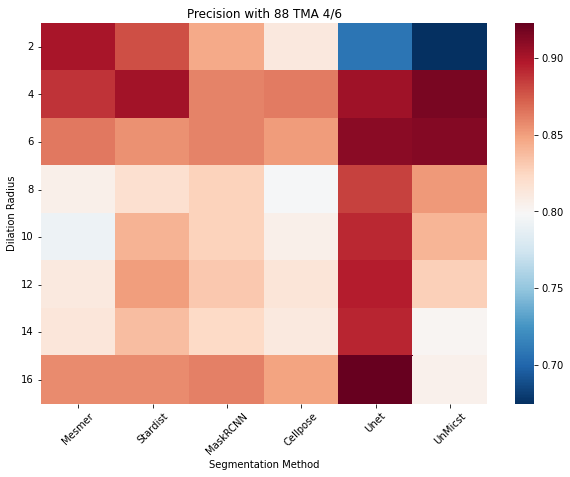

In [59]:
mean_precision = {}

for i in r:
    vals = {}
    for j in seg:
        temp = []
        for keys, values in precision.items():
            for radii, methods in values.items():
                for m, num in methods.items():
                    if radii == i and m == j:
                        temp.append(num)

        vals[j] = np.mean(temp)
        mean_precision[i] = vals
        
print(mean_precision)

df = pd.DataFrame(mean_precision).transpose()
#df.loc[len(df.index)] = df.mean(axis=0)
display(df)

cores = ["2", "4", "6", "8", "10", "12", "14", "16"]
methods = ["Mesmer", "Stardist", "MaskRCNN", "Cellpose", "Unet", "UnMicst"]

plt.figure(figsize = (10, 7))
ax = sns.heatmap(df, xticklabels=methods, yticklabels=cores, cmap="RdBu_r").set(title="Precision with 88 TMA 4/6")
plt.xlabel("Segmentation Method")
plt.ylabel("Dilation Radius")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.savefig("/home/users/thirumal/precision_88TMA.png", dpi=300)
print("image saved")

,mesmer,stardist,maskrcnn,cellpose,unet,unmicst
2,0.952609,0.901497,0.941378,0.922692,0.923517,0.916600
4,0.971348,0.971044,0.956606,0.921684,0.884284,0.869745
6,0.987704,0.986264,0.925126,0.876152,0.752974,0.737863
8,0.991812,0.952609,0.957294,0.865839,0.732588,0.760474
10,0.986492,0.933904,0.940533,0.907938,0.776446,0.834437
12,0.988787,0.933094,0.942974,0.912275,0.800571,0.864437
14,0.979921,0.931828,0.947019,0.920039,0.839103,0.873746
16,0.984313,0.951917,0.922921,0.904520,0.852704,0.888065


image saved


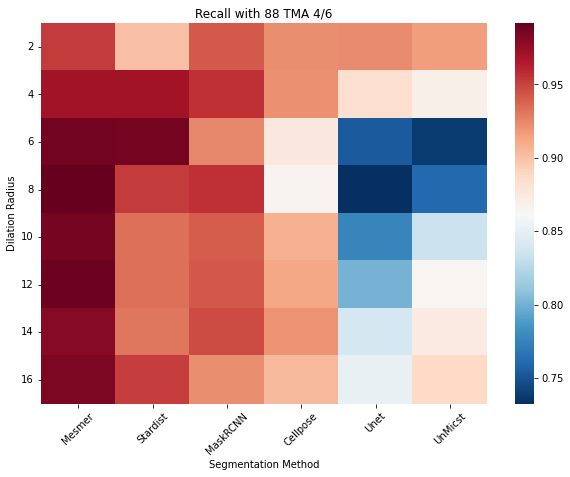

In [61]:
mean_recall = {}

for x in r:
    vals_recall = {}
    for y in seg:
        temp_recall = []
        for keys, values in recall.items():
            for radii, methods in values.items():
                for m, num in methods.items():
                    if radii == x and m == y:
                        temp_recall.append(num)

        vals_recall[y] = np.mean(temp_recall)
        mean_recall[x] = vals_recall

        
df_recall = pd.DataFrame(mean_recall).transpose()
display(df_recall)

cores = ["2", "4", "6", "8", "10", "12", "14", "16"]
methods = ["Mesmer", "Stardist", "MaskRCNN", "Cellpose", "Unet", "UnMicst"]

plt.figure(figsize = (10, 7))
ax = sns.heatmap(df_recall, xticklabels=methods, yticklabels=cores, cmap="RdBu_r").set(title="Recall with 88 TMA 4/6")
plt.xlabel("Segmentation Method")
plt.ylabel("Dilation Radius")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.savefig("/home/users/thirumal/recall_88TMA.png", dpi=300)
print("image saved")